# ML-08-BSP13
Ayush kumar


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('./data.csv')

In [ ]:
data.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [ ]:
data.shape

(2000, 16)

In [ ]:
data.nunique()

year                         1
customer_id               1999
phone_no                  2000
gender                       2
age                         63
no_of_days_subscribed      204
multi_screen                 2
mail_subscribed              2
weekly_mins_watched       1260
minimum_daily_mins         149
maximum_daily_mins        1260
weekly_max_night_mins      111
videos_watched              19
maximum_days_inactive        7
customer_support_calls      10
churn                        2
dtype: int64

In [ ]:
data.drop(['year','customer_id','phone_no'], axis=1,inplace=True)

In [ ]:
data.shape

(2000, 13)

In [ ]:
missing_list = list(data.isnull().sum()[data.isnull().sum() > 0].index)

In [ ]:
missing_list

['gender', 'maximum_days_inactive', 'churn']

In [ ]:
print(data['gender'].value_counts())

Male      1053
Female     923
Name: gender, dtype: int64


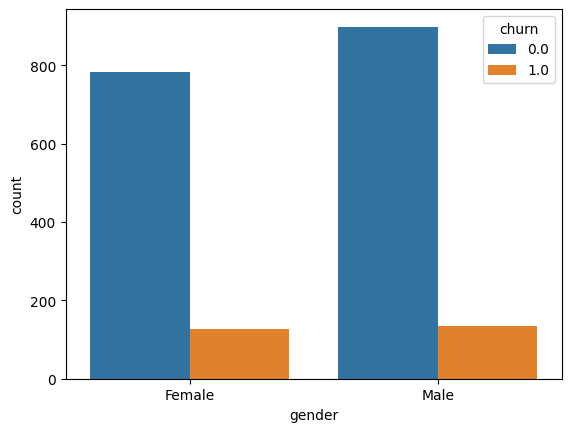

In [ ]:
sns.countplot(x="gender", data=data, hue="churn")
plt.show()

In [ ]:
data['maximum_days_inactive'].value_counts()

3.0    945
4.0    645
2.0    273
5.0     85
1.0     12
0.0     10
6.0      2
Name: maximum_days_inactive, dtype: int64

In [ ]:
data.head(10)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
5,NaN,31,65,no,no,193.65,12.7,21.95,111,6,4.0,4,1.0
6,NaN,54,59,no,no,239.25,10.2,27.12,106,4,NaN,0,0.0
7,Female,40,50,no,no,196.65,5.6,22.29,88,9,NaN,5,1.0
8,Male,61,205,no,yes,263.70,7.8,29.89,64,5,3.0,2,0.0
9,Male,31,63,no,no,316.80,12.3,35.90,58,2,4.0,0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  1976 non-null   object 
 1   age                     2000 non-null   int64  
 2   no_of_days_subscribed   2000 non-null   int64  
 3   multi_screen            2000 non-null   object 
 4   mail_subscribed         2000 non-null   object 
 5   weekly_mins_watched     2000 non-null   float64
 6   minimum_daily_mins      2000 non-null   float64
 7   maximum_daily_mins      2000 non-null   float64
 8   weekly_max_night_mins   2000 non-null   int64  
 9   videos_watched          2000 non-null   int64  
 10  maximum_days_inactive   1972 non-null   float64
 11  customer_support_calls  2000 non-null   int64  
 12  churn                   1965 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 203.2+ KB


In [ ]:

ymapp={'yes':1,'no':0}

In [ ]:

data['multi_screen']=data['multi_screen'].map(ymapp)
data['mail_subscribed']=data['mail_subscribed'].map(ymapp)
data.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0.0


/tmp/ipykernel_10259/3695472170.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='1.2f', annot_kws={'size' : 10}, linewidth=1, cmap="coolwarm")


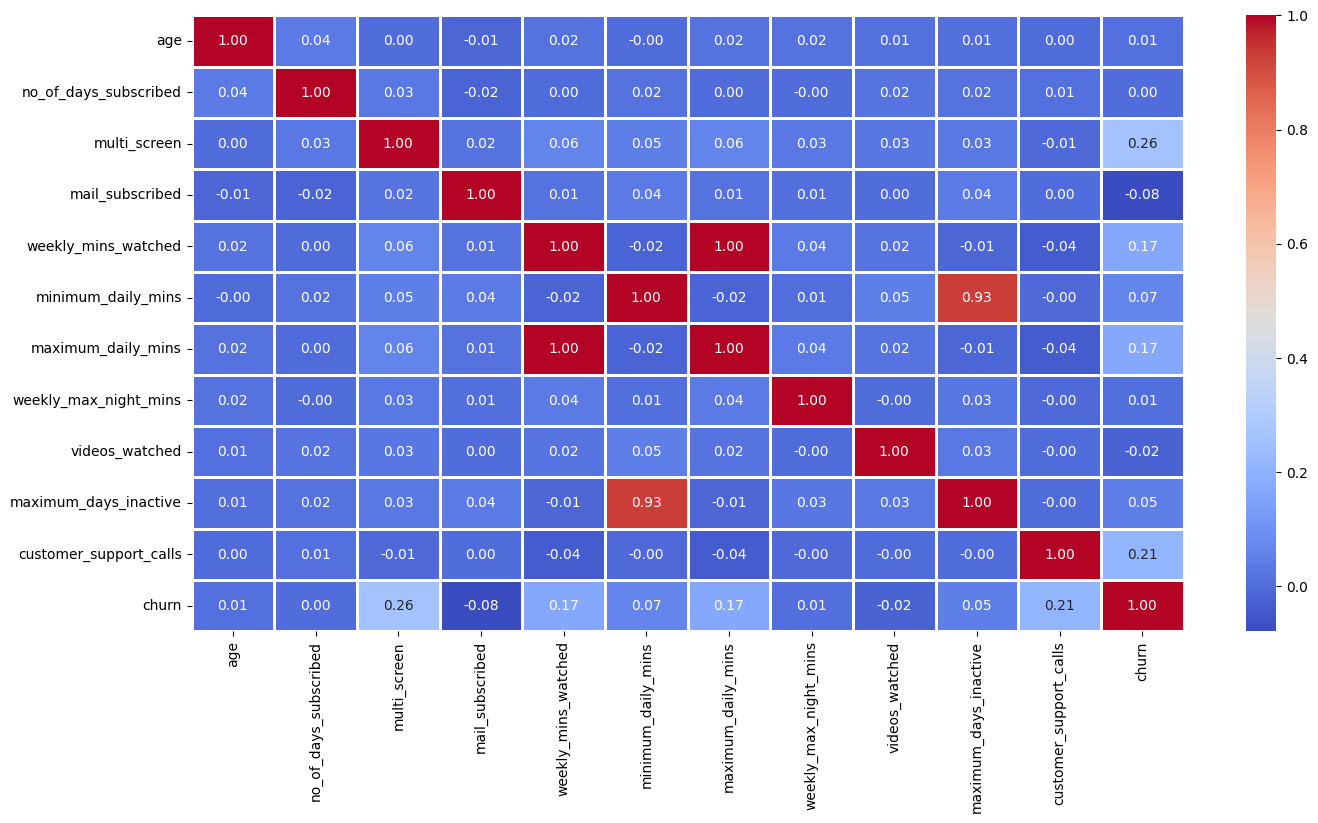

In [ ]:
# Heatmap

fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(data.corr(), annot=True, fmt='1.2f', annot_kws={'size' : 10}, linewidth=1, cmap="coolwarm")
plt.show()

In [ ]:
data.drop(['maximum_days_inactive','weekly_mins_watched','gender'], axis=1,inplace=True)

In [ ]:
data.head()

,age,no_of_days_subscribed,multi_screen,mail_subscribed,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
0,36,62,0,0,12.2,16.81,82,1,1,0.0
1,39,149,0,0,7.7,33.37,87,3,2,0.0
2,65,126,0,0,11.9,9.89,91,1,5,1.0
3,24,131,0,1,9.5,36.41,102,4,3,0.0
4,40,191,0,0,10.9,27.54,83,7,1,0.0


In [ ]:
data.isnull().sum()

age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
customer_support_calls     0
churn                     35
dtype: int64

In [ ]:
data.dropna(subset='churn',inplace = True)

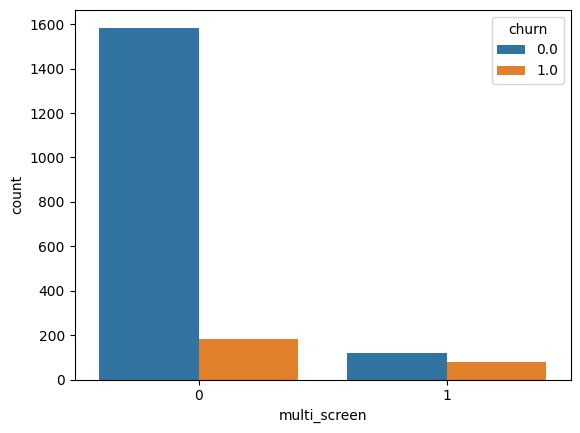

In [ ]:
sns.countplot(x="multi_screen", data=data, hue="churn")
plt.show()

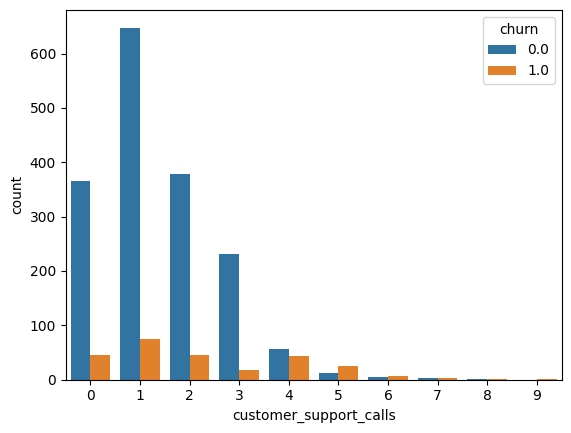

In [ ]:
sns.countplot(x="customer_support_calls", data=data, hue="churn")
plt.show()

In [ ]:
data["churn"].value_counts()

0.0    1703
1.0     262
Name: churn, dtype: int64

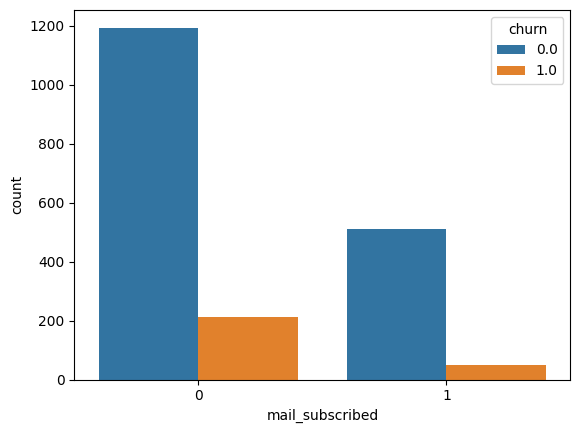

In [ ]:
sns.countplot(x="mail_subscribed", data=data, hue="churn")
plt.show()

In [ ]:
data[['videos_watched','churn']].groupby('videos_watched').mean()

,churn
videos_watched,
0,0.000000
1,0.181818
2,0.185315
3,0.119107
4,0.117479
5,0.110320
6,0.121212
7,0.140625
8,0.114286


/tmp/ipykernel_10259/3912391197.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["no_of_days_subscribed"], ax=axes[0])
/tmp/ipykernel_10259/3912391197.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["age"], ax=axes[1])


<AxesSubplot: xlabel='age', ylabel='Density'>

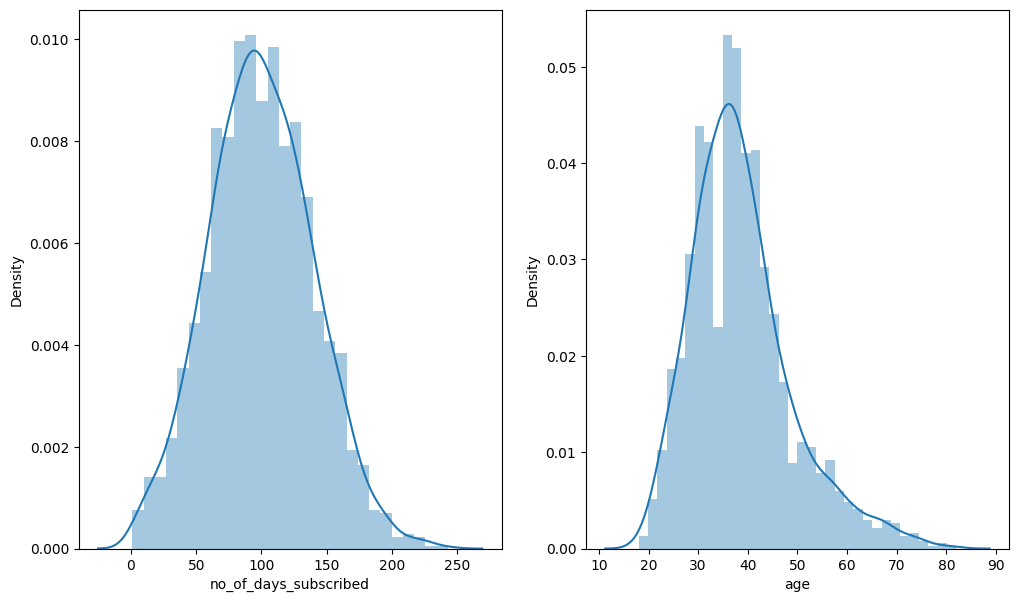

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(data["no_of_days_subscribed"], ax=axes[0])
sns.distplot(data["age"], ax=axes[1])

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data["multi_screen"].value_counts()

0    1769
1     196
Name: multi_screen, dtype: int64

In [ ]:
data.shape

(1965, 10)

In [ ]:
data.columns

Index(['age', 'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'minimum_daily_mins', 'maximum_daily_mins', 'weekly_max_night_mins',
       'videos_watched', 'customer_support_calls', 'churn'],
      dtype='object')

In [ ]:
cont_col=['age', 'no_of_days_subscribed', 'multi_screen','minimum_daily_mins', 'maximum_daily_mins', 'weekly_max_night_mins',
       'videos_watched', 'customer_support_calls']

In [ ]:
cat_features = ['multi_screen', 'mail_subscribed']
X = pd.get_dummies(data, columns=cat_features, drop_first=True)

In [ ]:
sc = MinMaxScaler()
for col in cont_col:
    a=sc.fit_transform(data[[col]])
    X[col]=a

In [ ]:
X.shape

(1965, 11)

In [ ]:
data.head()

,age,no_of_days_subscribed,multi_screen,mail_subscribed,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
0,36,62,0,0,12.2,16.81,82,1,1,0.0
1,39,149,0,0,7.7,33.37,87,3,2,0.0
2,65,126,0,0,11.9,9.89,91,1,5,1.0
3,24,131,0,1,9.5,36.41,102,4,3,0.0
4,40,191,0,0,10.9,27.54,83,7,1,0.0


In [ ]:
X.head()

,age,no_of_days_subscribed,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn,multi_screen_1,mail_subscribed_1,multi_screen
0,0.281250,0.252066,0.610,0.281858,0.300752,0.052632,0.111111,0.0,0,0,0.0
1,0.328125,0.611570,0.385,0.559524,0.338346,0.157895,0.222222,0.0,0,0,0.0
2,0.734375,0.516529,0.595,0.165828,0.368421,0.052632,0.555556,1.0,0,0,0.0
3,0.093750,0.537190,0.475,0.610496,0.451128,0.210526,0.333333,0.0,0,1,0.0
4,0.343750,0.785124,0.545,0.461771,0.308271,0.368421,0.111111,0.0,0,0,0.0


In [ ]:
X.drop(['multi_screen_1'], axis=1,inplace=True)

In [ ]:
X.shape

(1965, 10)

In [ ]:
#resampling
#0.0    1703
#1.0     262
#value count of churn

In [ ]:
X_no = X[X.churn == 0]
X_yes = X[X.churn == 1]

In [ ]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

1703


In [ ]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
X_upsampled["churn"].value_counts()

/tmp/ipykernel_10259/1222475160.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)


0.0    1703
1.0    1703
Name: churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X = X_upsampled.drop(['churn'], axis=1) #features
y = X_upsampled['churn'] #target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify= y)

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
clf_ridge = RidgeClassifier() #create a ridge classifier object
clf_ridge.fit(X_train, y_train) #train the model

RidgeClassifier()

In [ ]:
pred = clf_ridge.predict(X_train)
accuracy_score(y_train, pred)

0.7422907488986784

In [ ]:
pred_test = clf_ridge.predict(X_test)
accuracy_score(y_test, pred_test)

0.7419354838709677

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.9629221732745962

In [ ]:
pred_test = clf_forest.predict(X_test)
accuracy_score(y_test, pred_test)

0.9252199413489736

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

In [ ]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

In [ ]:
clf.best_params_
{'max_depth': 20, 'n_estimators': 150}
clf.best_score_

0.9732029141932002

In [ ]:
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.9765395894428153

### Confusion matrix

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

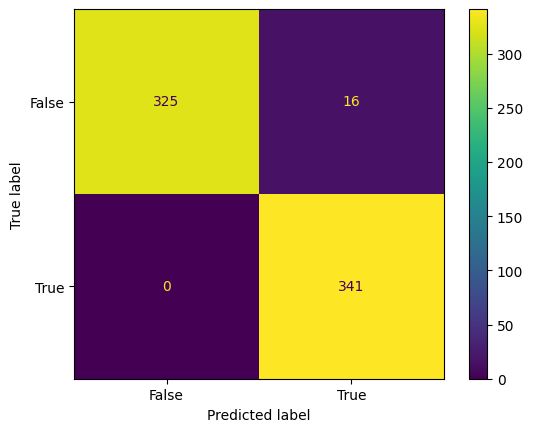

In [ ]:

confusion_matrix = metrics.confusion_matrix(y_test, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

## Recal score  
recall score = correctly predected as positive / Total actual  positive

so recal score = 341 / 341
**recal score = 1.00**

## Precision score  
precision score = TP/(TP+FP)

so, precision score = 341 / (341 + 16)
**precision score = 0.9518**